<a href="https://colab.research.google.com/github/sedrisella/Pemrograman-python/blob/main/TASK_8_MODUL_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning : Pengenalan Gambar Batu,Gunting, Kertas dengan Convolutional Neural Network

Deep Learning adalah proses mengolah data no eksak.Dan pada praktek kali ini
adalah membuat agar komputer belajar mengetahui gambar yang di tampilakan 
apakah batu,gunting atau kertas.
Dalam prosesnya gambar diubah menjadi matriks dan vektor kemudia dilakukan training.Setelah itu model bisa digunakan untuk pendektesian.Ada kalanya komputer gagal mendeteksi gambar jika terjadi hal seperti itu kita bisa mengubah parameter-parameter dan mengulang training.

In [43]:
#mengunzip file yang telah didownload
import zipfile, os

local_zip = "RockPaperScissors.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("file_extracted")
zip_ref.close()


In [44]:
from sklearn.model_selection import train_test_split

In [54]:
import os

base_dir = "file_extracted/RockPaperScissors"
print(os.listdir(base_dir))


['Paper.png', 'PaperSelected.png', 'RockPaperScissors.jpg', 'Rock.png', 'RockSelected.png', 'ScissorsSelected.png', 'Scissors.png']


In [50]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [57]:
#Argumentasi gambar secara artifisial membuat gambar pelatihan melalui berbagai cara
#Pemrosesan atau kombinasi dari beberapa pemrosesan ,seperti rotasi acak,pergeseran,geser,balik dll

from tensorflow.keras.preprocessing.image import ImageDataGenerator
file_extracted = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [60]:
train_generator = file_extracted.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = file_extracted.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [21]:
import tensorflow as tf
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(100,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(3,activation="softmax")
])


In [61]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [35]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving Paper.png to Paper (6).png


ValueError: ignored

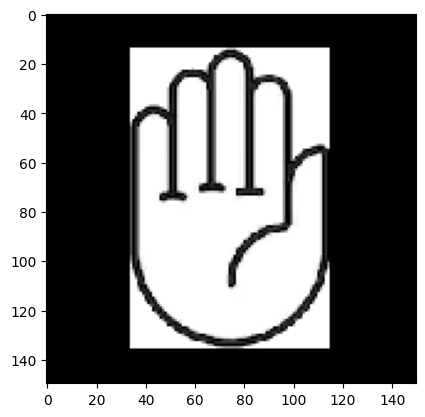

In [63]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  #urutan CLass nya yaitu [Paper, Rock, Scissors]
  print(fn)
  if classes[0][0]==1:
    print(' Paper')
  elif classes[0][1]==1:
    print('Rock')
  else:
    print('Scissors')




Saving Rock.png to Rock (2).png


ValueError: ignored

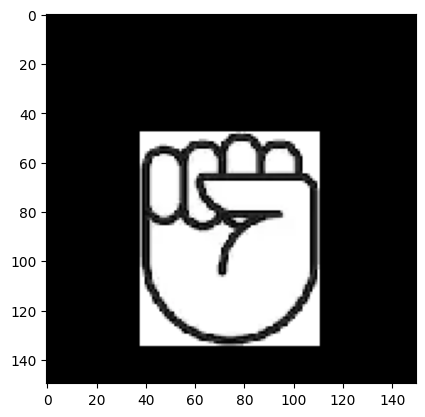

In [64]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  #urutan CLass nya yaitu [Paper, Rock, Scissors]
  print(fn)
  if classes[0][0]==1:
    print(' Paper')
  elif classes[0][1]==1:
    print('Rock')
  else:
    print('Scissors')


Saving Scissors.png to Scissors (1).png


ValueError: ignored

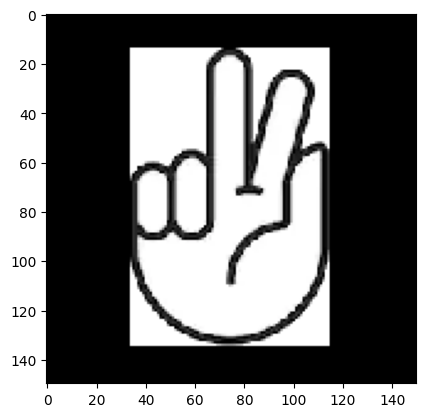

In [65]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  #urutan CLass nya yaitu [Paper, Rock, Scissors]
  print(fn)
  if classes[0][0]==1:
    print(' Paper')
  elif classes[0][1]==1:
    print('Rock')
  else:
    print('Scissors')
